# Inteligencja Obliczeniowa w Analizie danych cyfrowych

## Lab 4. Środowisko własne

### Miłosz Góralczyk

Jak ostatnio, umieściłem część raportu nad częścią kodu, w celu lepszego dostępu dla sprawdzającego. 

Aby wygenerować ponownie dane, również te wykorzystane w Raporcie, należy najpierw uruchomić komórki częśći II. Kod źródłowy laboratorium

Grę można uruchomić w trybie graficznym kompilując z rozdziału II. sprawozdania - Kod źródłowy i pozyskanie danych, część 1, zawierającą środowisko rozgrywki, a następnie uruchomienie 2 pierwszych komórek z części 2.

## I. Raport z laboratorium

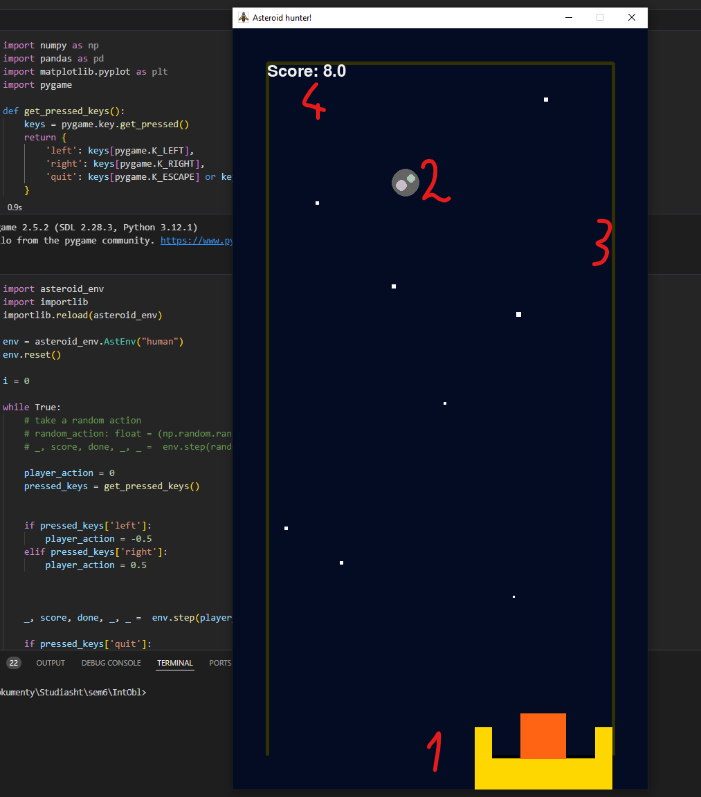

1. Statek Kosmiczny: agent sterowany strzałkami

2. Asteroida: przeszkoda o losowym wektorze ruchu i prędkości

3. Granica płótna: odbijalna bariera

4. Licznik: Wyświetla aktualny wynik rozgrywki

Utworzona za pomocą Pygame oraz gym.env gra ma nazwę Asteroid Hunter.

Rozgrywka toczy się w przestrzenii ciągłej, z agentem reprezentowanym przez statek kosmiczny, lecący przez gwieździestą próżnię kosmosu

Zadaniem agenta jest unikanie asteroid spadających z góry ekranu

Asteroidy poruszają się w dół, posiadając losoowy wektor kierunku

Statek może poruszać się w lewo lub w prawo u dołu okna w celu manewrowania wokół spadających asteroid

### Punktacja

gracz zaczyna z 0 punktami, każde uniknięcie asteroidy dodaje 1 pkt do wyniku

wpadnięcie na asteroidę resetuje rozgrywkę, oznaczając 'game over'

Ilość punktów spada w takim momencie do 0

### Action Space

składa się z wyjścia akcepowanego przez program, definiującego ruch w danym kroku.

U nas stanowi to jedna wartość *ship_velocity*

Na podstawie niego kalkulowana jest zmiana położenia statku w kolejnych krokach

### Observable space

To, co program zwraca agentowi by podjął decyzję.

Tutaj składa się z czterech pozycji, prezentując się następująco:

            "rock_position": self._rock_position,
            "rock_velocity": self._rock_velocity,
            "ship_position": self._ship_position,
            "ship_velocity": self._ship_velocity,

Dwie wartości określają położenie i prędkość asteroidy, dwie kolejne zwradają położenie i prędkość statku kosmicznego.

### Zasady

na początku rozgrywki asteroida pojawia się w losowym miejscu na górze ekranu i otrzymuje losowy wektor prędkości skierowany w dół

W przypadku napotkania którejś ze ścian, asteroida zmienia swój kierunek na osi x na ten sam z przeciwnym zwrotem, odbijając się od ściany.

W momencie zderzenia się z dolną granicą okna, gra kalkuluje czy doszło do zderzenia ze statkiem.

Jeżeli nie: asteroida znika, graczowi przyznawany jest jeden punkt, oraz z góry zaczyna spadać kolejna przeszkoda o losowym kierunku.

Jeżeli tak: gracz przegrywa, liczba punktów spada do zera i następuje reset rozgrywki

### Sterowanie w wersji z agentem gracza:

-> - ruch statku w prawo

<- - ruch statku w lewo

Esc - Zamknięcie okna rozgrywki

### Hiperparametry programu:
- SIZE_X = 75
- SIZE_Y= 125
- RADIUS = 4
- SHIP_WIDTH = 20
- SHIP_HEIGHT = 20
- MAX_SHIP_SPEED = 2.
- MAX_SCORE = 2000
- HIGH_SCORE_RANGE = 0.2
- PADDING = 50
- WINDOW_SIZE_MODIFIER = 10
- DEFAULT_WIDTH = 5

Określają po kolei:
- Wymiary okna
- średnicę asteroidy
- wymiary statku kosmicznego
- maksymlną prędkość statku
- parametry przedziału wyniku
- padding okna rozgrywki
- współczynnik powiększenia okna
- szerokość barier części interaktywnej

## Model oraz Trenowanie

Trenowanie zostało oparte o model sieci neuronowej, pozwalające za pomocą przetwarzania wielu tysięcy rozgrywek opanować optymalną strategię w celu maksymalizacji funkcji wyniku.

Model na wejściu otrzymuje sytuację o rozgrywce, zwracając rozkazy co do ruchu w następnym kroku

w celu trenowania modelu na zbiorze danych zapisanym w pliku `data.csv` należy uruchomić skrypt `train.py` z odpowiednimi argumentami. Skrypt ten przyjmuje następujące argumenty:
- `--data_path` - ścieżka do pliku z danymi
- `--model_path` - ścieżka do pliku, w którym zostanie zapisany wytrenowany model
- `--model_type` - typ modelu, który ma zostać wytrenowany. Możliwe wartości to `linear` oraz `mlp`
- `--epochs` - liczba epok trenowania modelu
- `--batch_size` - rozmiar batcha
- `--learning_rate` - learning rate
- `--hidden_size` - liczba neuronów w warstwie ukrytej dla modelu MLP

Przykładowe użycie:
```
python3 train.py --data_path data.csv --model_path model.pth --model_type linear --epochs 100 --batch_size 32 --learning_rate 0.01
```

Po wytrenowaniu modelu można go wykorzystać do predykcji na nowych danych. W tym celu należy uruchomić skrypt `predict.py` z odpowiednimi argumentami. Skrypt ten przyjmuje następujące argumenty:
- `--data_path` - ścieżka do pliku z danymi
- `--model_path` - ścieżka do pliku z modelem
- `--output_path` - ścieżka do pliku, w którym zostaną zapisane predykcje
- `--model_type` - typ modelu, który ma zostać użyty. Możliwe wartości to `linear` oraz `mlp`

Przykładowe użycie:
```
python3 predict.py --data_path data.csv --model_path model.pth --output_path predictions.csv --model_type linear
```


W celu trenowania dokładnie modelu naszego środowiska AstEnv, należy najpierw zarejestrować je jako oficjalne środowisko Gym

Zostało to zrealizowane tym kodem:

```
from gym.envs.registration import register

register(
    id='custom/asteroid-v1',
    entry_point='asteroid_env:AstEnv',
    max_episode_steps=2000
)

from gym import make
env = make('custom/asteroid-v1', render_mode=None, ship_size = (15, 15))
```

Posiadając już przygotowane środowisko, można utworzyć model sieci neuronowej na której dane są trenowane. Użyta została sieć architektury Q-Network

Jej wizualizacja została przygotowana za pomocą narzędzia online Netron (netron.app)

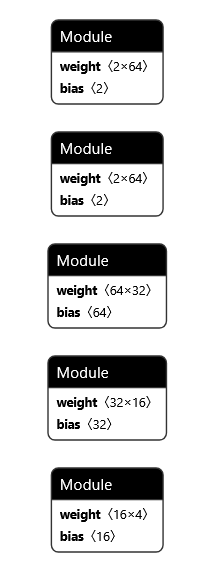

Model posiada trzy warstwy ukryte, z 16,32, oraz 64 neuronami

Funkcją nieliniowości jest TanH()
Na wejściu otrzymuje paramtry obserwowalne, a na wyjściu otrzymać można współczynniki środowiska akcji

### Trenowanie

Zastosowano Reinforcement Learning z wcześniejszego laboratorium, wraz z użyciem Discount Factor Gamma

Wartości Hiperparametrów nauczania:

- Learning Rate: 0.001
- Epochs - 1000
- Num of seeds - 1
- Gamma Factor - 0.9
- Optimizer - torch.optim.Adam

Jak zawsze, model stara się optymalizować wynik w celu uzyskania jak najwyższego score paramter, które jest bezpośrednio związane proporcjonalnie z nagrodą.

Wynik nauczania wygląda.. ciekawie, zdecydowanie


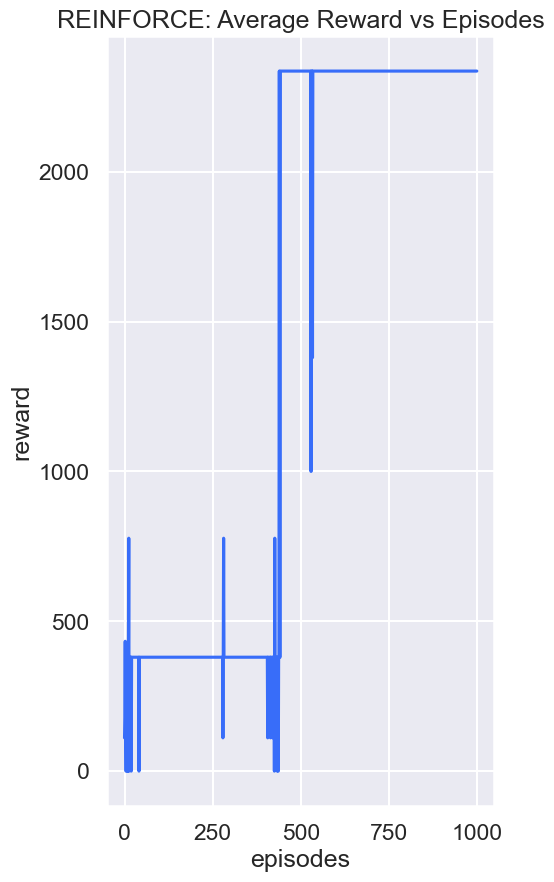


Jak widać, na przestrzenii 1000 epochów model uzyskał w rozgrywce wynik około 2000 pkt, gdzie wynik oparł się o górny limit MAX_SCORE środowiska asteroid_env

W środku nauczania modelowi powiodło się 'rozwiązać' grę, otrzymując konsekwentnie max score raz za razem

Domyślam się że wygląd wykresu wynika z jakichś specyficznych niewykrytych cech utworzonej gry, jak uzyskanie specyficznego wektora prędkości po wygenerowaniu w specyficznym miejscu przez asteroidę.

Kilka takich osoliwości w czasie testowania i dostrajania wykryłem i usunąłem, lecz więcej może wpływać na wyniki już symulowanego tysiące razy środowiska.

### Wyniki

Udało się w trakcie laboratorium:
- stworzyć środowisko do nowo napisanej gry
- utworzyć za pomocą PyGame interaktywnego okna rozgrywki, gdzie użytkownik może samemu zagrać
- Uzupełnić środowisko o rzeczy potrzebne do nauczania jak Action_space i Observable_space
- Zarejestrowanie środowiska w celu użycia wraz z Gymem
- przyswojenie modelu sieci z poprzedniego laboratorium do nowego problemu
- Wytrenowanie modelu oraz rozwiązanie utworzonej gry


Końcowa strategia modelu do rozgrywki jest prosta, lecz skuteczna, polega ona w głównej części na.. unikaniu asteroid

Z moich obserwacji, agent osiąga to przez gwałtowne przesunięcie się na przeciwną stronę okna niż miejsce, w które ma trafić asteroida

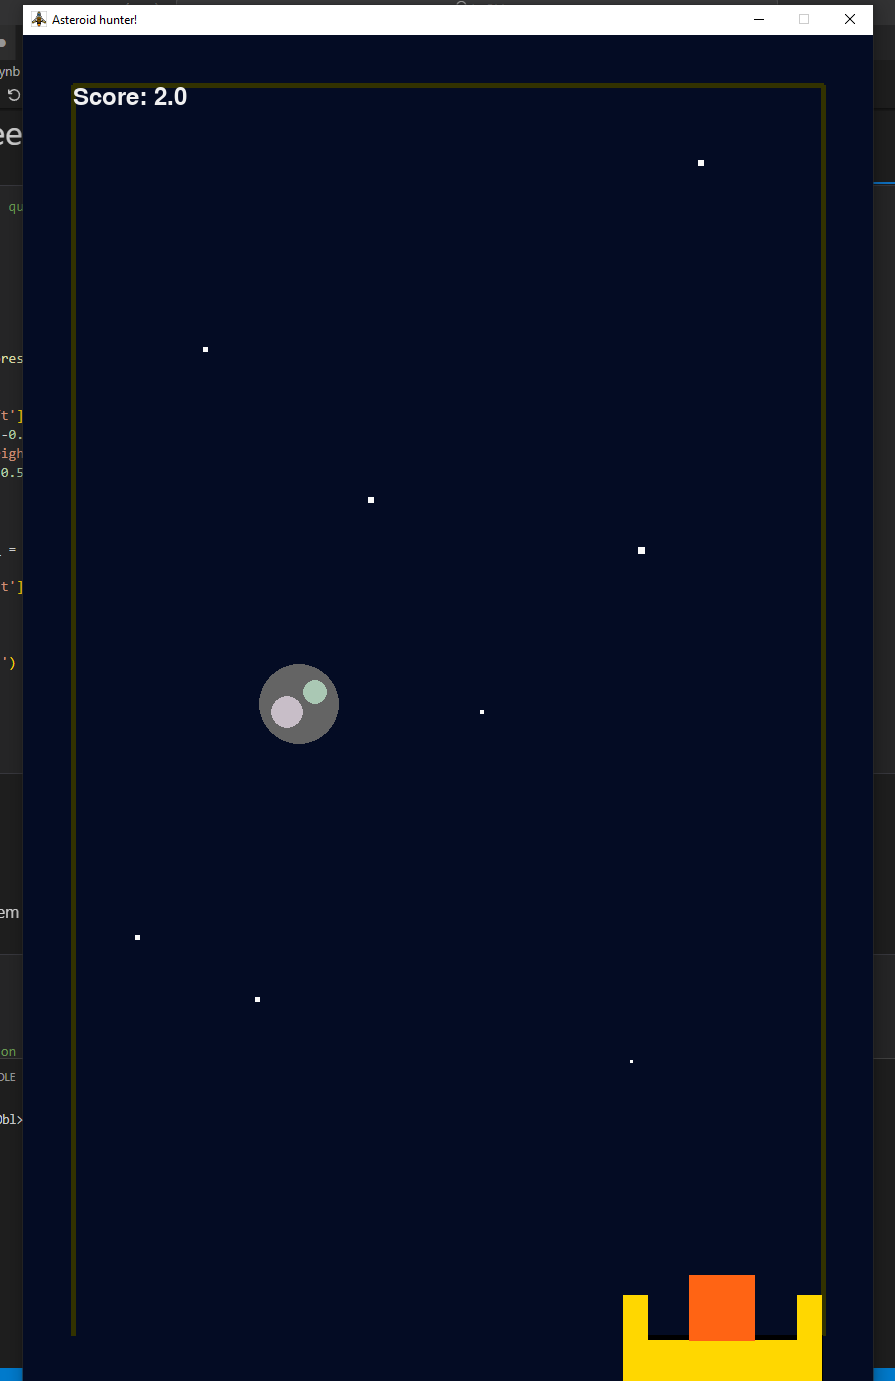

## II. Kod źródłowy laboratorium, pozyskanie danych

### Część 1 - Utworzenie Enviroment - Asteroid

In [1]:
from typing import Dict, Any, ClassVar, Tuple, Optional

import numpy as np
import pygame
import gym
from gym import spaces
from gym.core import ActType, ObsType


class AstEnv(gym.Env):
    metadata = {
        "render_modes": [
            "human",
        ],
        "render_fps": 60,
    }


    SIZE_X = 75
    SIZE_Y= 125
    RADIUS = 4
    SHIP_WIDTH = 20
    SHIP_HEIGHT = 20
    MAX_SHIP_SPEED = 2.
    MAX_SCORE = 2000
    HIGH_SCORE_RANGE = 0.2
    PADDING = 50
    WINDOW_SIZE_MODIFIER = 10
    DEFAULT_WIDTH = 5

    def __init__(
            self,
            render_mode = None,
            size = None,
            ship_size = None,
            max_points = None,
    ):
        if render_mode is not None and render_mode not in self.metadata["render_modes"]:
            raise ValueError(f'Unknown render mode: \'{render_mode}\'!')

        self.render_mode = render_mode

        if size is None:
            size = (AstEnv.SIZE_X, AstEnv.SIZE_Y, AstEnv.RADIUS)

        x_size, y_size, radius = size

        if x_size <= 0 or y_size <= 0 or radius <= 0:
            raise ValueError(f"""Game dimensions are incorrect, because they contain negative or zero-like numbers:
                \'{x_size=}\' or \'{y_size}\' or \'{radius}\'!""")

        self._size: np.ndarray = np.array(size, dtype=np.uint16)

        self.observation_space = spaces.Dict({
            "rock_position": spaces.Box(
                np.array([0., 0.], dtype=np.float32),
                np.array([float(x_size), float(y_size)], dtype=np.float32),
                shape=(2,),
                dtype=np.float32,
            ),
            "rock_velocity": spaces.Box(
                np.array([-1., -1.], dtype=np.float32),
                np.array([1., 1.], dtype=np.float32),
                shape=(2,),
                dtype=np.float32
            ),
            "ship_position": spaces.Box(
                0.,
                float(x_size),
                shape=(1,),
                dtype=np.float32
            ),
            "ship_velocity": spaces.Box(
                -AstEnv.MAX_SHIP_SPEED,
                AstEnv.MAX_SHIP_SPEED,
                shape=(1,),
                dtype=np.float32
            ),
        })

        if ship_size is None:
            ship_size = (AstEnv.SHIP_WIDTH, AstEnv.SHIP_HEIGHT)

        ship_width, ship_height = ship_size

        if ship_width <= 0 or ship_height <= 0:
            raise ValueError(
                f"""
                ship dimensions are incorrect, because they contain negative or zero-like numbers:
                \'{ship_width=}\' or \'{ship_height}\'!
                """.lstrip().rstrip()
            )

        self._ship_size: np.ndarray = np.array(ship_size, dtype=np.uint16)

        # Change in speed of the ship
        self.action_space: spaces.Space[ActType] = spaces.Box(-1.0, 1.0, shape=(1,), dtype=np.float32)

        if max_points is None:
            max_points = AstEnv.MAX_SCORE

        if max_points <= 0:
            raise ValueError(f'Max score cannot be negative or zero-like: \'{max_points=}\'!')

        self.window = None
        self.clock = None

        self._rock_position = None
        self._rock_velocity = None
        self._ship_position = None
        self._ship_velocity = None

        self._points = 0.
        self._max_points = float(max_points)
        self.reward_range = (self._points, self._max_points)

    def _get_observations(self):
        return {
            "rock_position": self._rock_position,
            "rock_velocity": self._rock_velocity,
            "ship_position": self._ship_position,
            "ship_velocity": self._ship_velocity,
        }

    def _get_info(self):
        return {

            "ship_left_distance": self._ship_position[0] - 0.,
            "ship_right_distance": float(self._size[0]) - self._ship_position[0],
            "ship_actual_left_distance": self._ship_position[0] - 0. - self._ship_size[0],
            "ship_actual_right_distance": float(self._size[0]) - self._ship_position[0] - self._ship_size[0],
        }

    def reset(
            self,
            seed: Optional[int] = None,
            options: Optional[Dict[str, Any]] = None
    ):
        super().reset(seed=seed, options=options)

        size_x, size_y, radius = self._size
        rng: np.random.Generator = self.np_random
        x = ((rng.random(dtype=np.float32) * size_x + radius) * 0.9)
        y = (size_y) / 10
        self._rock_position = np.array(
            (x, y),
            dtype=np.float32
        )
        self._rock_velocity = np.array(
            [
                rng.random(dtype=np.float32) * 2. - 1.,
                rng.random(dtype=np.float32) * 0.5 + 0.5,
            ],
            dtype=np.float32
        )
        self._ship_position = np.array(
            [self._size.astype(np.float32)[0] / 2.],
            dtype=np.float32
        )
        self._ship_velocity = np.array(
            [0.],
            dtype=np.float32
        )
        self._points = 0.

        observation = self._get_observations()
        info = self._get_info()

        self.render()

        return observation, info

    def step(self, action):
        
        rng: np.random.Generator = self.np_random

        # Cap max ship speed
        self._ship_velocity = np.clip(
            self._ship_velocity + action,
            -AstEnv.MAX_SHIP_SPEED,
            AstEnv.MAX_SHIP_SPEED
        )

        # Do not allow out of bounds for ship
        self._ship_position = np.clip(
            self._ship_position + self._ship_velocity,
            float(self._ship_size[0] / 2.),
            float(self._size[0] - self._ship_size[0] / 2.)
        )

        self._rock_position += self._rock_velocity

        rock_x, rock_y = self._rock_position
        size_x, size_y, radius = self._size

        # Top collision
        if rock_y < radius:
            self._rock_velocity[1] *= -1.
            
        # Left collision and Right collision
        if rock_x < radius or rock_x > size_x - radius:
            self._rock_velocity[0] *= -1.

        game_over = False

        half_ship_length = self._ship_size[0] // 2
        ship_start = self._ship_position - half_ship_length
        ship_end = self._ship_position + half_ship_length

        # Bottom collision
        if rock_y > size_y - radius:
            if ship_start <= rock_x <= ship_end:
                game_over = True
            else:
              x = ((rng.random(dtype=np.float32) * size_x + radius) * 0.9)
              y = (size_y) / 10
              self._rock_position = np.array(
                  (x, y),
                  dtype=np.float32
              )
              self._rock_velocity = np.array(
                  [
                      rng.random(dtype=np.float32) * 2. - 1.,
                      rng.random(dtype=np.float32) * 0.5 + 0.5,
                  ],
                  dtype=np.float32)
                
              self._points += 1

        game_over |= self._points >= self._max_points

        reward = self._points
        # reward = self._points - 50
        observation = self._get_observations()
        info = self._get_info()

        self.render()

        return observation, reward, game_over, False, info

    def render(self) -> None:
        if self.render_mode == "human":
            self._render_frame()
      
    def _render_frame(self) -> None:
        game_size = (self._size * AstEnv.WINDOW_SIZE_MODIFIER)[:2]
        game_x, game_y = game_size
        window_x, window_y = game_size + 2 * AstEnv.PADDING

        if self.window is None:
            pygame.init()
            pygame.display.init()
            self.window = pygame.display.set_mode((window_x, window_y))
            pygame.display.set_caption('Asteroid hunter!')
            pygame.display.set_icon(pygame.image.load("spaceship.jpg"))

        if self.clock is None:
            self.clock = pygame.time.Clock()

        # Draw sky
        canvas = pygame.Surface((window_x, window_y))
        canvas.fill((4,12,36))

        # Draw stars as small rectangles
        pygame.draw.rect(canvas,(250,250,250),pygame.Rect(game_x * 0.24, game_y * 0.25, 5, 5),)
        pygame.draw.rect(canvas,(250,250,250),pygame.Rect(game_x * 0.61, game_y * 0.54, 4,4),)
        pygame.draw.rect(canvas,(250,250,250),pygame.Rect(game_x * 0.82, game_y * 0.41, 7,7),)
        pygame.draw.rect(canvas,(250,250,250),pygame.Rect(game_x * 0.15, game_y * 0.72, 5,5),)
        pygame.draw.rect(canvas,(250,250,250),pygame.Rect(game_x * 0.46, game_y * 0.37, 6,6),)
        pygame.draw.rect(canvas,(250,250,250),pygame.Rect(game_x * 0.81, game_y * 0.82, 3,3),)
        pygame.draw.rect(canvas,(250,250,250),pygame.Rect(game_x * 0.31, game_y * 0.77, 5,5),)
        pygame.draw.rect(canvas,(250,250,250),pygame.Rect(game_x * 0.90, game_y * 0.10, 6,6),)

        # Draw border
        pygame.draw.lines(
            canvas,
            (50,50,0),
            False,
            [
                (AstEnv.PADDING, AstEnv.PADDING + game_y),
                (AstEnv.PADDING, AstEnv.PADDING),
                (AstEnv.PADDING + game_x, AstEnv.PADDING),
                (AstEnv.PADDING + game_x, AstEnv.PADDING + game_y),
            ],
            width=AstEnv.DEFAULT_WIDTH,
        )

        # Draw ship
        ship_point_position = self._ship_position[0]
        pygame.draw.rect(
            canvas,
            (255,215,0),
            pygame.Rect(
                (ship_point_position - self._ship_size[0] / 2.) * AstEnv.WINDOW_SIZE_MODIFIER + AstEnv.PADDING,
                game_y + AstEnv.PADDING,
                *(self._ship_size * AstEnv.WINDOW_SIZE_MODIFIER)
            ),
        )
        pygame.draw.rect(
            canvas,
            (0,0,0),
            pygame.Rect(
                (ship_point_position - self._ship_size[0] / 2.) * AstEnv.WINDOW_SIZE_MODIFIER + AstEnv.PADDING,
                game_y + AstEnv.PADDING,
                *(self._ship_size * AstEnv.WINDOW_SIZE_MODIFIER)
            ),
            width=AstEnv.DEFAULT_WIDTH,
        )
        pygame.draw.rect(
            canvas,
            (255,100,20),
            pygame.Rect(
                (ship_point_position - self._ship_size[0] / 6.) * AstEnv.WINDOW_SIZE_MODIFIER + AstEnv.PADDING,
                game_y + AstEnv.PADDING - self._ship_size[1] * 3,
                *(self._ship_size * AstEnv.WINDOW_SIZE_MODIFIER * (1/3,1/3))
            ),
        )
        pygame.draw.rect(
            canvas,
            (255,215,0),
            pygame.Rect(
                (ship_point_position - self._ship_size[0] / 2.) * AstEnv.WINDOW_SIZE_MODIFIER + AstEnv.PADDING,
                game_y + AstEnv.PADDING - self._ship_size[1] * 2,
                *(self._ship_size * AstEnv.WINDOW_SIZE_MODIFIER * (1/8, 1))
            ),
        )
        pygame.draw.rect(
            canvas,
            (255,215,0),
            pygame.Rect(
                (ship_point_position + self._ship_size[0] / 2.7) * AstEnv.WINDOW_SIZE_MODIFIER + AstEnv.PADDING,
                game_y + AstEnv.PADDING - self._ship_size[1] * 2 ,
                *(self._ship_size * AstEnv.WINDOW_SIZE_MODIFIER * (1/8, 1))
            ),
        )

        # Draw asteroid, one circle with two lighter circles inside
        ast_x, ast_y = self._rock_position[:2] * AstEnv.WINDOW_SIZE_MODIFIER
        _, _, radius = self._size * AstEnv.WINDOW_SIZE_MODIFIER
        pygame.draw.circle(
            canvas,
            (100, 100, 100),
            (ast_x + AstEnv.PADDING, ast_y + AstEnv.PADDING),
            radius
        )
        pygame.draw.circle(
            canvas,
            (170, 200, 180),
            (ast_x + AstEnv.PADDING + radius * 0.4, ast_y + AstEnv.PADDING - radius * 0.3),
            radius * 0.3
        )
        pygame.draw.circle(
            canvas,
            (200, 190, 200),
            (ast_x + AstEnv.PADDING - radius * 0.3, ast_y + AstEnv.PADDING + radius * 0.2),
            radius * 0.4
        )

      # Draw score in the top left corner in white
        font = pygame.font.Font(None, 36)

        text = font.render(f"Score: {self._points}", True, (240, 240, 240))
        canvas.blit(text, (AstEnv.PADDING, AstEnv.PADDING))

        self.window.blit(canvas, canvas.get_rect())
        pygame.event.pump()
        pygame.display.update()

        self.clock.tick(self.metadata["render_fps"])

    def close(self) -> None:
        if self.window is not None:
            pygame.display.quit()
            pygame.quit()


pygame 2.5.2 (SDL 2.28.3, Python 3.12.1)
Hello from the pygame community. https://www.pygame.org/contribute.html


### Część 2. wizualizacja rozgrywki

ESC do opuszczenia rozgrywki

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pygame

def get_pressed_keys():
    keys = pygame.key.get_pressed()
    return {
        'left': keys[pygame.K_LEFT],
        'right': keys[pygame.K_RIGHT],
        'quit': keys[pygame.K_ESCAPE] or keys[pygame.K_q],
    }


## Środowisko steerowane przez człowieka

In [4]:
# controls: left, right, quit

env = AstEnv("human")
env.reset()

while True:

    player_action = 0
    pressed_keys = get_pressed_keys()


    if pressed_keys['left']:
        player_action = -0.5
    elif pressed_keys['right']:
        player_action = 0.5

    

    _, score, done, _, _ =  env.step(player_action)

    if pressed_keys['quit']:
        break
    
    if done:
        print(f'{score=}')
        env.reset()


env.close()

score=18.0


Środowisko z losowym agentem

In [38]:
env = AstEnv("human")
env.reset()

while True:
    # take a random action
    random_action: float = (np.random.random() * 2. -1.) * 0.5
    _, score, done, _, _ =  env.step(random_action)

    pressed_keys = get_pressed_keys()

    _, score, done, _, _ =  env.step(player_action)

    if pressed_keys['quit']:
        break
    
    if done:
        print(f'{score=}')
        env.reset()


env.close()

### Część 3. Agent inteligentny

In [21]:
from __future__ import annotations

import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
from torch.distributions.normal import Normal

plt.rcParams["figure.figsize"] = (5, 10)

In [22]:
from gym.envs.registration import register

register(
    id='custom/asteroid-v1',
    entry_point='asteroid_env:AstEnv',
    max_episode_steps=2000
)

from gym import make
env = make('custom/asteroid-v1', render_mode=None, ship_size = (15, 15))

In [23]:
class Policy_Network(nn.Module):
    """Parametrized Policy Network."""

    def __init__(self, obs_space_dims: int, action_space_dims: int):
        super().__init__()

        hidden_space1 = 16
        hidden_space2 = 32
        hidden_space3 = 64

        # Shared Network
        self.shared_net = nn.Sequential(
            nn.Linear(obs_space_dims, hidden_space1),
            nn.Tanh(),
            nn.Linear(hidden_space1, hidden_space2),
            nn.Tanh(),
            nn.Linear(hidden_space2, hidden_space3),
            nn.Tanh(),
        )

        # Policy Mean specific Linear Layer
        self.policy_mean_net = nn.Sequential(
            nn.Linear(hidden_space3, action_space_dims)
        )

        # Policy Std Dev specific Linear Layer
        self.policy_stddev_net = nn.Sequential(
            nn.Linear(hidden_space3, action_space_dims)
        )

    def forward(self, x: torch.Tensor) -> tuple[torch.Tensor, torch.Tensor]:
        shared_features = self.shared_net(x.float())

        action_means = self.policy_mean_net(shared_features)
        action_stddevs = torch.log(
            1 + torch.exp(self.policy_stddev_net(shared_features))
        )

        return action_means, action_stddevs

In [24]:
def merge_obs_space(obs):
    obs_space = np.array([50, 25, 1.0, 1.0, 50, 4.0], dtype='float32')
    normalization_shift = np.array([-50, -25, 0, 0, -50, 0], dtype='float32')

    i = 0
    # print(obs)
    for item in obs:
        for val in obs[item]:
            # obs_space = np.append(obs_space, val)
            obs_space[i] = (val + normalization_shift[i]) / obs_space[i]
            i += 1
    return obs_space

In [25]:
class REINFORCE:

    def __init__(self, gamma, obs_space_dims: int, action_space_dims: int):

        # Hyperparameters
        self.learning_rate = 0.001  # Learning rate for policy optimization
        self.gamma = gamma  # Discount factor

        # set the epsilon to 0
        self.eps = 0  # small number for mathematical stability

        self.probs = []  # Stores probability values of the sampled action
        self.rewards = []  # Stores the corresponding rewards

        self.net = Policy_Network(obs_space_dims, action_space_dims)
        self.optimizer = torch.optim.Adam(self.net.parameters(), lr=self.learning_rate)

    def sample_action(self, state: np.ndarray) -> float:
        # print(state)
        state = torch.tensor(merge_obs_space(state))
        # print(state)
        action_means, action_stddevs = self.net(state)

        # create a normal distribution from the predicted
        #   mean and standard deviation and sample an action
        distrib = Normal(action_means[0] + self.eps, action_stddevs[0] + self.eps)
        action = distrib.sample()
        prob = distrib.log_prob(action)

        action = action.numpy()
        # print(f'{action=}', end='\n\n')
        self.probs.append(prob)

        return action

    def update(self):
        running_g = 0
        gs = []

        # Discounted return (backwards) - [::-1] will return an array in reverse
        for R in self.rewards[::-1]:
            running_g = R + self.gamma * running_g
            gs.insert(0, running_g)

        deltas = torch.tensor(gs)

        loss = 0
        # minimize -1 * prob * reward obtained
        for log_prob, delta in zip(self.probs, deltas):
            loss += log_prob.mean() * delta * (-1)

        # Update the policy network
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        # Empty / zero out all episode-centric/related variables
        self.probs = []
        self.rewards = []


In [26]:
import gym
# Create and wrap the environment
wrapped_env = gym.wrappers.RecordEpisodeStatistics(env, 50)  # Records episode-reward


total_num_episodes = 1000

obs, info  = env.reset()

obs_space = merge_obs_space(obs)


obs_space_dims = obs_space.shape[0]
action_space_dims = env.action_space.shape[0]

rewards_over_seeds_1 = []

seed = 777

for _ in range(1):
    torch.manual_seed(seed)
    random.seed(seed)
    np.random.seed(seed)


    agent_1 = REINFORCE(0.9, obs_space_dims, action_space_dims)
    reward_over_episodes_1 = []


    for episode in range(total_num_episodes):
        obs, info = wrapped_env.reset(seed=seed)
        

        done = False
        while not done:
            action = agent_1.sample_action(obs)
            obs, reward, terminated, truncated, info = wrapped_env.step(np.array([action]))
            agent_1.rewards.append(reward)

            done = terminated or truncated

        reward_over_episodes_1.append(wrapped_env.return_queue[-1])
        agent_1.update()

        if episode % 100 == 0 or episode == total_num_episodes - 1:
            avg_reward = int(np.mean(wrapped_env.return_queue))
            print("Episode:", episode, "Average Reward:", avg_reward)

    rewards_over_seeds_1.append(reward_over_episodes_1)


print("Training complete.")

c:\Users\Karolina\AppData\Local\Programs\Python\Python312\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode: 0 Average Reward: 111
Episode: 100 Average Reward: 380
Episode: 200 Average Reward: 380
Episode: 300 Average Reward: 382
Episode: 400 Average Reward: 380
Episode: 500 Average Reward: 2336
Episode: 600 Average Reward: 2336
Episode: 700 Average Reward: 2336
Episode: 800 Average Reward: 2336
Episode: 900 Average Reward: 2336
Episode: 999 Average Reward: 2336
Training complete.


In [35]:
import pandas as pd
import seaborn as sns

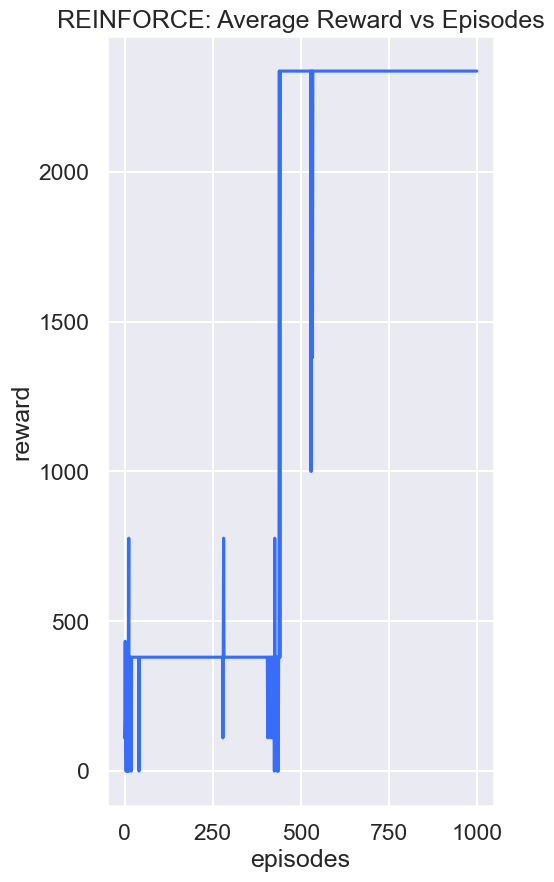

In [36]:
rewards_to_plot_1 = [[reward for reward in rewards] for rewards in rewards_over_seeds_1]
df1 = pd.DataFrame(rewards_to_plot_1).melt()
df1.rename(columns={"variable": "episodes", "value": "reward"}, inplace=True)
sns.set(style="darkgrid", context="talk", palette="rainbow")
sns.lineplot(x="episodes", y="reward", data=df1).set(
    title="REINFORCE: Average Reward vs Episodes",
)
plt.show()

In [37]:
final_rewards_1 = [rewards[-1] for rewards in rewards_over_seeds_1]

avg_final_reward_1 = np.mean(final_rewards_1)

print("Average final reward for gamma=0.9: ", avg_final_reward_1)

Average final reward for gamma=0.9:  2336.0
